In [147]:
%load_ext autoreload
%autoreload 2

import cstrees.cstree as ct
import numpy as np
import networkx as nx

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [148]:

np.random.seed(8)#9
p = 5
t = ct.sample_cstree(p)
#for l, sl in t.stages.items():
#    for s in sl:
#        print(s.color)
#a = t.plot()
#a
t.sample(10)

array([[1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 1, 1, 1],
       [1, 0, 1, 0, 1],
       [1, 1, 1, 1, 1],
       [1, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 1]])

In [149]:
csis = t.csi_relations()
for key, val in csis.items():
    print("Context: {}".format(key))
    for v in val:
        print(v.ci)
        #print("After decomposition")
        #for x in ct.decomposition(v.ci):
        #    print(str(x))
    print()

Context: 
X1 ⊥ X2

Context: X1=0
X2 ⊥ X3

Context: X1=1, X3=1
X2 ⊥ X4
X2, X4 ⊥ X5



In [150]:
co = t.co
adjmats = ct.csi_relations_to_dags(csis, co)
graphs=[(key,graph) for key, graph in adjmats.items()]

Context: 


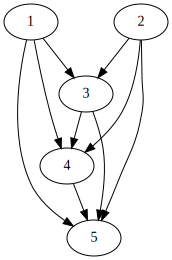

In [151]:

print("Context: {}".format(graphs[0][0]))
agraph = nx.nx_agraph.to_agraph(graphs[0][1])
agraph.layout("dot")
agraph

Context: X1=0


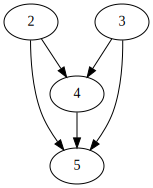

In [152]:
print("Context: {}".format(graphs[1][0]))
agraph = nx.nx_agraph.to_agraph(graphs[1][1])
agraph.layout("dot")
agraph

Context: X1=1, X3=1


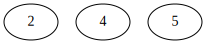

In [153]:
print("Context: {}".format(graphs[2][0]))
agraph = nx.nx_agraph.to_agraph(graphs[2][1])
agraph.layout("dot")
agraph

In [154]:
t.sample(10)

array([[1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0],
       [1, 0, 1, 1, 1],
       [0, 1, 1, 0, 0],
       [0, 1, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 1],
       [0, 0, 1, 1, 1],
       [0, 1, 1, 0, 0]])